# Machine Learning Exercise 11

# LeNet-like model for MNIST/FashionMNIST/CIFAR10



##Import 

Import libraries and print some versions.

To use GPU, set `Edit / Notebook settings / Hardware accelerator` to **GPU**.

In [ ]:
import numpy as np
import tensorflow as tf

print("Tensorflow version %s" %tf.__version__)

device_name = tf.test.gpu_device_name()
print('Found GPU at: {}'.format(device_name))

Tensorflow version 2.3.2
Found GPU at: /device:GPU:0


## Load data

Load training data from Keras library




In [ ]:
def load_data(dataset_name):
    # load data
    if dataset_name == "MNIST":
      (Xtrain,Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()
    elif dataset_name == "FASHION_MNIST":
      (Xtrain,Ytrain), (Xtest, Ytest) = tf.keras.datasets.fashion_mnist.load_data()
    elif dataset_name == "CIFAR10":
      (Xtrain,Ytrain), (Xtest, Ytest) = tf.keras.datasets.cifar10.load_data()
    else:
      print("Dataset not available")
      return None

    # get information
    ninput = Xtrain.shape[0]
    imgsize = (Xtrain.shape[1], Xtrain.shape[2])
    if len(Xtrain.shape)==3:
      image_depth=1
    else:
      image_depth=Xtrain.shape[3]

    input_shape = (Xtrain.shape[1], Xtrain.shape[2], image_depth)
    ntest = Xtest.shape[0]
    num_classes = max(Ytrain) + 1
    print("Training input %s" %str(Xtrain.shape))
    print("Training output %s" %str(Ytrain.shape))
    print("Test input %s" %str(Xtest.shape))
    print("Test output %s" %str(Ytest.shape))
    print("Input shape: %s" %str(input_shape))
    print("Number of classes: %d" %num_classes)

    # normalize input to [0,1]
    Xtrain = Xtrain / 255.0
    Xtest = Xtest / 255.0
    # reshape input in 4D array
    Xtrain = Xtrain.reshape(ninput,imgsize[0],imgsize[1],image_depth)
    Xtest = Xtest.reshape(ntest,imgsize[0],imgsize[1],image_depth)
        
    return [Xtrain,Ytrain,Xtest,Ytest,input_shape,num_classes]


dataset_name = "CIFAR10" # MNIST or FASHION_MNIST or CIFAR10
[Xtrain,Ytrain,Xtest,Ytest,input_shape,num_classes] = load_data(dataset_name)

Training input (50000, 32, 32, 3)
Training output (50000, 1)
Test input (10000, 32, 32, 3)
Test output (10000, 1)
Input shape: (32, 32, 3)
Number of classes: 10


## Show random image



[5]


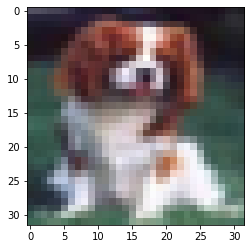

In [ ]:
import matplotlib.pyplot as plt
import random

i = random.randrange(0,Xtrain.shape[0])
image = Xtrain[i]
image = np.array(image, dtype='float')
pixels = image.reshape((input_shape[0], input_shape[1], input_shape[2]))

label = Ytrain[i]
print(label)

plt.imshow(pixels)
plt.show()


##LeNet model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
                         Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization
from tensorflow.keras import regularizers, optimizers

def LeNet(input_shape, num_classes):
    
    print('\nLeNet model')
    model = Sequential()
    
    print('\tC1: Convolutional 6 kernels 5x5')
    model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding='same'))
    print('\tS2: Average Pooling 2x2 stride 2x2')
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    print('\tC3: Convolutional 16 kernels 5x5')
    model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
    print('\tS4: Average Pooling 2x2 stride 2x2')
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    print('\tC5: Convolutional 120 kernels 5x5')
    model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
    model.add(Flatten())
    print('\tF6: Fully connected, 84 units')
    model.add(Dense(84, activation='tanh'))
    print('\tF7: Fully connected, 10 units')
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = 'adam' #alternative 'SGD'
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model
 
# create the model
model = LeNet(input_shape,num_classes)
model.summary()


LeNet model
	C1: Convolutional 6 kernels 5x5
	S2: Average Pooling 2x2 stride 2x2
	C3: Convolutional 16 kernels 5x5
	S4: Average Pooling 2x2 stride 2x2
	C5: Convolutional 120 kernels 5x5
	F6: Fully connected, 84 units
	F7: Fully connected, 10 units
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d_10 (Averag (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_11 (Averag (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 2, 2, 120)         48120     
___

## Train

In [ ]:
epochs = 30
history = model.fit(Xtrain, Ytrain, batch_size=32, epochs=epochs, validation_data = (Xtest,Ytest))



Epoch 1/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7852 - accuracy: 0.3682 - val_loss: 1.6514 - val_accuracy: 0.4126
Epoch 2/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5645 - accuracy: 0.4462 - val_loss: 1.5150 - val_accuracy: 0.4647
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4587 - accuracy: 0.4835 - val_loss: 1.4984 - val_accuracy: 0.4668
Epoch 4/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3880 - accuracy: 0.5081 - val_loss: 1.4433 - val_accuracy: 0.4869
Epoch 5/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3282 - accuracy: 0.5314 - val_loss: 1.3749 - val_accuracy: 0.5089
Epoch 6/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2779 - accuracy: 0.5467 - val_loss: 1.3521 - val_accuracy: 0.5219
Epoch 7/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2270 - accuracy: 0.5656 - val_loss: 1.3237 - val_accuracy:

##Evaluate the model

## Print scores

Overall accuracy, precision, recall and F-score 

In [ ]:
import sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix

# accuracy
score = model.evaluate(Xtest, Ytest)
print("Test loss: %f" %score[0])
print("Test accuracy: %f" %score[1])

preds = model.predict(Xtest,verbose=1)
Ypred = np.argmax(preds, axis=1)

print('%s' %str(Ypred.shape))
print('%s' %str(Ytest.shape))

print(classification_report(Ytest, Ypred, digits=3))


  

313/313 [==============================] - 1s 2ms/step - loss: 1.7718 - accuracy: 0.5258
Test loss: 1.771785
Test accuracy: 0.525800
313/313 [==============================] - 0s 1ms/step
(10000,)
(10000, 1)
              precision    recall  f1-score   support

           0      0.586     0.551     0.568      1000
           1      0.613     0.657     0.634      1000
           2      0.473     0.342     0.397      1000
           3      0.383     0.345     0.363      1000
           4      0.436     0.459     0.447      1000
           5      0.466     0.472     0.469      1000
           6      0.559     0.634     0.594      1000
           7      0.554     0.625     0.587      1000
           8      0.574     0.658     0.613      1000
           9      0.579     0.515     0.545      1000

    accuracy                          0.526     10000
   macro avg      0.522     0.526     0.522     10000
weighted avg      0.522     0.526     0.522     10000



##Plot results

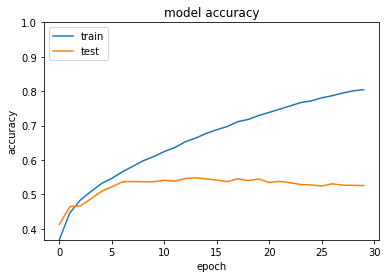

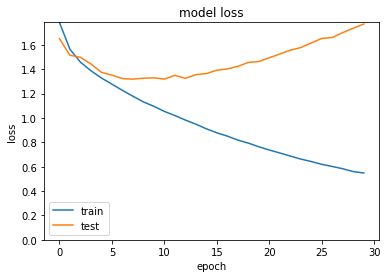

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(np.min(history.history['accuracy']), 1.0)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0.0, np.max(history.history['loss']))
plt.legend(['train', 'test'], loc='lower left')
plt.show()

# Home Exercises

**Question 1** 

Compare the model defined above with a model with the same structure but with `ReLU` activation functions in all the layers.
